# Property Price Register - Machine Learning analysis

## Section 0 - Initial Preparation

### Section 0.1 - Import required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

import pydot
from IPython.display import Image, display

%matplotlib inline

## Section 1 - Data Understanding and Preparation

### Section 1.x - Introduction

Our objective is to use a sample of the Residential Property Price Register (RPPR) to make inference about the price of houses in the Republic of Ireland. We will explore the dataset, transform the dataset appropriately, train various machine learning models using the dataset, validate these models, and perform tests for generalisability (how well does our final model predict house prices). 

Both the input and target features come from the RPPR, which is a dataset containing details of the sale of all residential properties purchased in Ireland since the 1st January 2010, as declared to the Revenue Commissioners for stamp duty purposes.

### Section 1.x - Read in the cleaned dataset

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.head()

,Date_of_Sale,Postal_Code,County,Price_€_VAT_incl,Description_of_Property,Property_Size_Description,Month_of_Sale,Quarter_of_Sale
0,2020-05-21,unknown,Roscommon,180000.0,Second-Hand Dwelling house /Apartment,unknown,May,2
1,2011-09-08,unknown,Kilkenny,73500.0,Second-Hand Dwelling house /Apartment,unknown,September,3
2,2021-09-24,dublin 15,Dublin,280000.0,Second-Hand Dwelling house /Apartment,unknown,September,3
3,2021-08-18,unknown,Louth,205000.0,Second-Hand Dwelling house /Apartment,unknown,August,3
4,2013-08-02,dublin 9,Dublin,282500.0,Second-Hand Dwelling house /Apartment,unknown,August,3


### Section 1.x: Change the data types

In [4]:
df.dtypes

Date_of_Sale                  object
Postal_Code                   object
County                        object
Price_€_VAT_incl             float64
Description_of_Property       object
Property_Size_Description     object
Month_of_Sale                 object
Quarter_of_Sale                int64
dtype: object

In [5]:
# Change the price variable to a float
df["Price_€_VAT_incl"] = df["Price_€_VAT_incl"].astype(float)

In [6]:
# Change the date of sale variable to a datetime variable
df["Date_of_Sale"] = pd.to_datetime(df["Date_of_Sale"], format="%Y-%m-%d")

In [7]:
# Change the quarter of sale variable to an object
# This is so that it can be turned into a categorical variable in the next cell
df["Quarter_of_Sale"] = df["Quarter_of_Sale"].astype("object")

In [8]:
# Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns

# Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

Date_of_Sale                 datetime64[ns]
Postal_Code                        category
County                             category
Price_€_VAT_incl                    float64
Description_of_Property            category
Property_Size_Description          category
Month_of_Sale                      category
Quarter_of_Sale                    category
dtype: object

### Section 1.x - Shuffle dataset rows and split dataset into separate training and test datasets

The training dataset will be used for model construction and validation. The test dataset will be used at the very end of our analysis to test the generalisability of our final model.

In [9]:
# The input variables will be all columns except for price and date of sale
X = df.drop(["Price_€_VAT_incl", "Date_of_Sale"], axis=1)

# The target variable will be property price
y = df["Price_€_VAT_incl"]

# We will use 70% of the data for model training, and the rest for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

### Section 1.x: Categorical feature plots

#### Section 1.x.x: Postal_Code vs Price 

<Figure size 432x288 with 0 Axes>

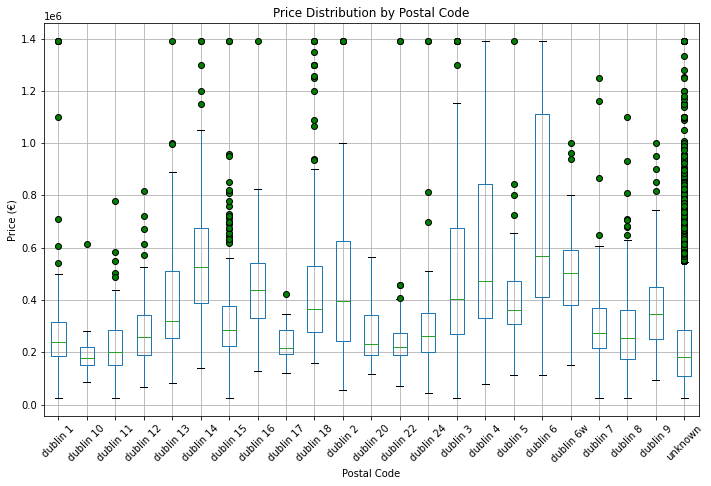

In [10]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Postal_Code'], flierprops=flierprops, figsize=(10,7))
plt.title("Price Distribution by Postal Code")
plt.xlabel("Postal Code")
plt.ylabel("Price (€)")
plt.suptitle("")
plt.xticks(rotation=45);
plt.tight_layout()

#### Section 1.x.x: County vs Price

<Figure size 432x288 with 0 Axes>

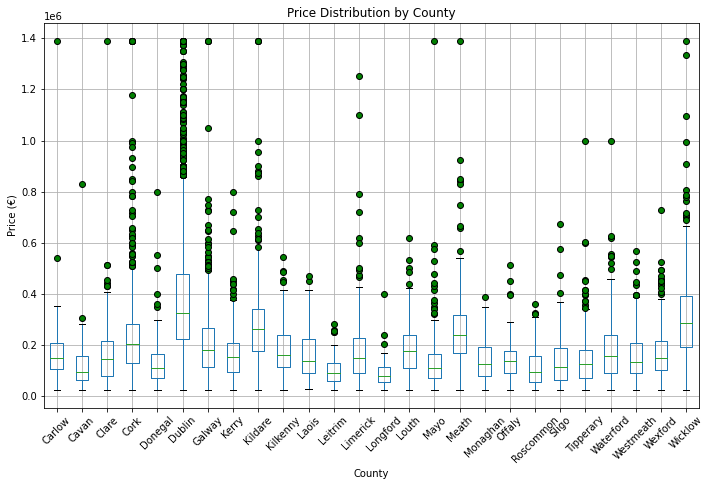

In [11]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['County'], flierprops=flierprops, figsize=(10,7))
plt.title("Price Distribution by County")
plt.xlabel("County")
plt.ylabel("Price (€)")
plt.suptitle("")
plt.xticks(rotation=45);
plt.tight_layout()

#### Section 1.x.x: Description of Property vs Price

<Figure size 432x288 with 0 Axes>

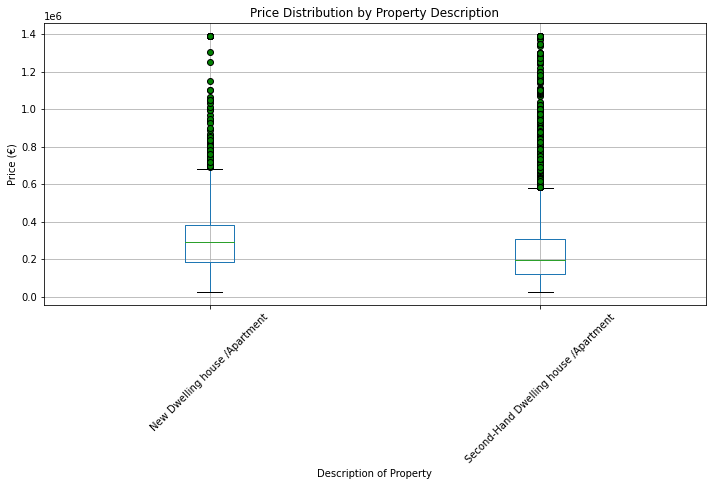

In [12]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Description_of_Property'], flierprops=flierprops, figsize=(10,7))
plt.title("Price Distribution by Property Description")
plt.xlabel("Description of Property")
plt.ylabel("Price (€)")
plt.suptitle("")
plt.xticks(rotation=45);
plt.tight_layout()

#### Section 1.x.x: Property Size Description vs Price

<Figure size 432x288 with 0 Axes>

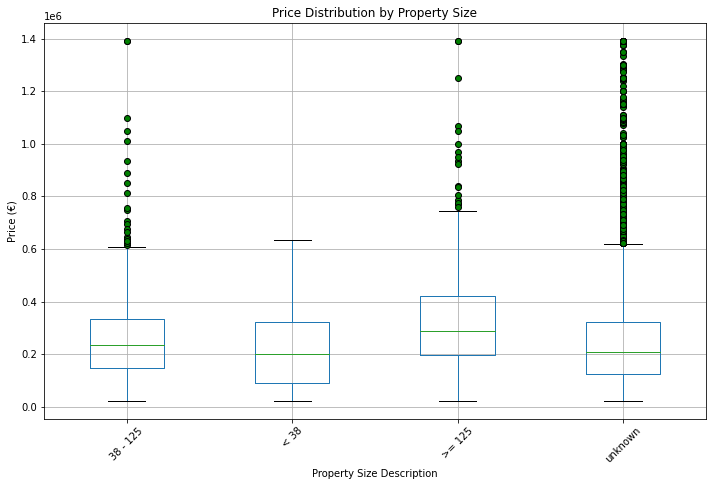

In [13]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Property_Size_Description'], flierprops=flierprops, figsize=(10,7))
plt.title("Price Distribution by Property Size")
plt.xlabel("Property Size Description")
plt.ylabel("Price (€)")
plt.suptitle("")
plt.xticks(rotation=45);
plt.tight_layout()

#### Section 1.x.x: Month of Sale vs Price

<Figure size 432x288 with 0 Axes>

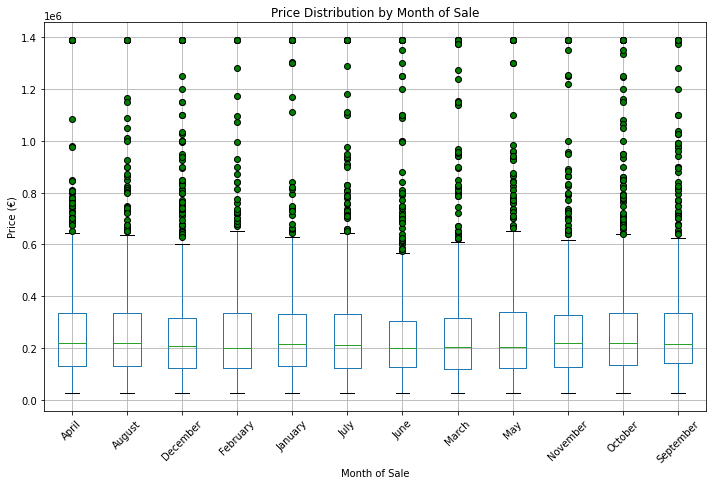

In [14]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Month_of_Sale'], flierprops=flierprops, figsize=(10,7))
plt.title("Price Distribution by Month of Sale")
plt.xlabel("Month of Sale")
plt.ylabel("Price (€)")
plt.suptitle("")
plt.xticks(rotation=45);
plt.tight_layout()

#### Section 1.x.x: Quarter of Sale vs Price

<Figure size 432x288 with 0 Axes>

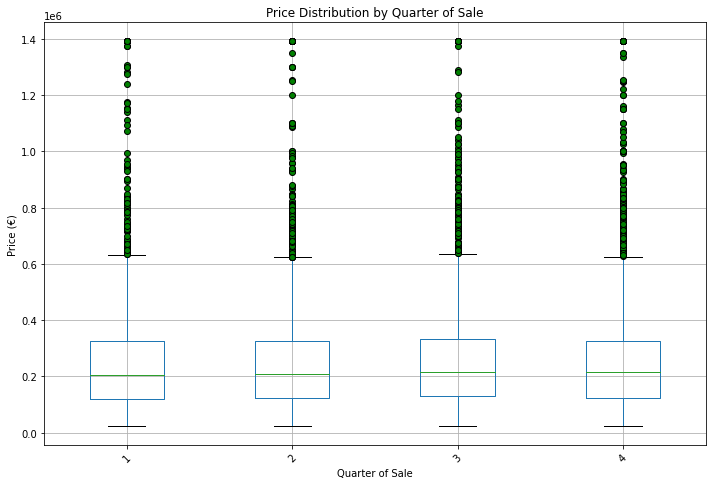

In [15]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['Price_€_VAT_incl'], by=['Quarter_of_Sale'], flierprops=flierprops, figsize=(10,7))
plt.title("Price Distribution by Quarter of Sale")
plt.xlabel("Quarter of Sale")
plt.ylabel("Price (€)")
plt.suptitle("")
plt.xticks(rotation=45);
plt.tight_layout()

Observations: All features seem as though they have some relationship with the price feature (with the exception of month of sale and quarter of sale. The distribution of price values does not appear to vary according as month/quarter varies). We can conclude from this that all variables except month of sale and quarter of sale should be dropped from our final model

#### Section 1.x.x: Drop unused features

In [16]:
X_train.drop(["Month_of_Sale", "Quarter_of_Sale"], axis=1, inplace=True)
X_test.drop(["Month_of_Sale", "Quarter_of_Sale"], axis=1, inplace=True)

### Section 1.x - Reencode categorical variables

In [17]:
category_columns = X_train.select_dtypes(['category']).columns

for each in category_columns:
    dummies = pd.get_dummies(X_train[each], prefix=each, drop_first = True)
    X_train = pd.concat([X_train, dummies], axis=1)
X_train = X_train.drop(category_columns, axis=1)

for each in category_columns:
    dummies = pd.get_dummies(X_test[each], prefix=each, drop_first = True)
    X_test = pd.concat([X_test, dummies], axis=1)
X_test = X_test.drop(category_columns, axis=1)

## Section 2: Linear Regression

### Section 2.x: Train a linear regression model

In [18]:
# Train, aka fit, a model using all continuous features.
linreg = LinearRegression().fit(X_train, y_train)

In [19]:
(pd.DataFrame({'coef':linreg.coef_, 'category':X_train.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

,coef
category,
Postal_Code_dublin 6,360711.324014
Postal_Code_dublin 4,269247.767293
County_Dublin,232910.067935
Postal_Code_dublin 3,221238.236578
Postal_Code_dublin 14,214253.224484
Postal_Code_dublin 6w,195917.466226
Postal_Code_dublin 18,171512.939003
Postal_Code_dublin 2,167089.657116
County_Wicklow,158942.607573


### Section 2.x: Interpretation of linear regression model

From our initial coefficients, we can see that being located in certain postal code districts and counties can significantly bring up/down the average property price. For example, the property price decreases by €139,569 on average when you move from the base case (Dublin 1) to Dublin 10, while the property price increases by €360,711 on average when you move from the base case (Dublin 1) to Dublin 6. Our base case for counties is Carlow, as this was the first county alphabetically. We see that moving from Carlow to counties like Dublin, Wicklow, and Kildare drastically increases the average property price, while moving from Carlow to Leitrim, Longford, and Roscommon drastically decreases the average property price. This aligns with our initial expectations (properties near Dublin, the central economic hub of Ireland, tend to be more valuable on average, whilst properties that are located far away from commercial activity tend to be less valuable on average)

We also see that the value of properties go down when you move from a new house to a second-hand dwelling house/apartment, which is what we would expect (people are inclined to pay less for second-hand houses, as these houses tend to be in poorer condition on average, and can often require additional renovations which need to be factored into the cost). The property price is also impacted by size. People appear to be enclined to pay more for a bigger property, and less for a smaller property, which also aligns with our expectations (in general, people prefer having more space).

### Section 2.x: Training set predictions

#### Predicted target feature value for the first 10 training samples

In [20]:
first_10_x = X_train.head(10)

In [21]:
linreg_training_10_predictions = list(linreg.predict(first_10_x))

In [22]:
training_10_actual = list(y_train.head(10))

In [23]:
for i in range(len(linreg_training_10_predictions)):
    print(f"Predicted: {round(linreg_training_10_predictions[i])}, Actual: {training_10_actual[i]}, Difference: {round(linreg_training_10_predictions[i]) - training_10_actual[i]}")

Predicted: 219444, Actual: 206000.0, Difference: 13444.0
Predicted: 318939, Actual: 352000.0, Difference: -33061.0
Predicted: 237266, Actual: 265000.0, Difference: -27734.0
Predicted: 219444, Actual: 230000.0, Difference: -10556.0
Predicted: 373333, Actual: 260000.0, Difference: 113333.0
Predicted: 159794, Actual: 66500.0, Difference: 93294.0
Predicted: 209441, Actual: 100760.0, Difference: 108681.0
Predicted: 377576, Actual: 259999.0, Difference: 117577.0
Predicted: 219444, Actual: 82500.0, Difference: 136944.0
Predicted: 179368, Actual: 152000.0, Difference: 27368.0


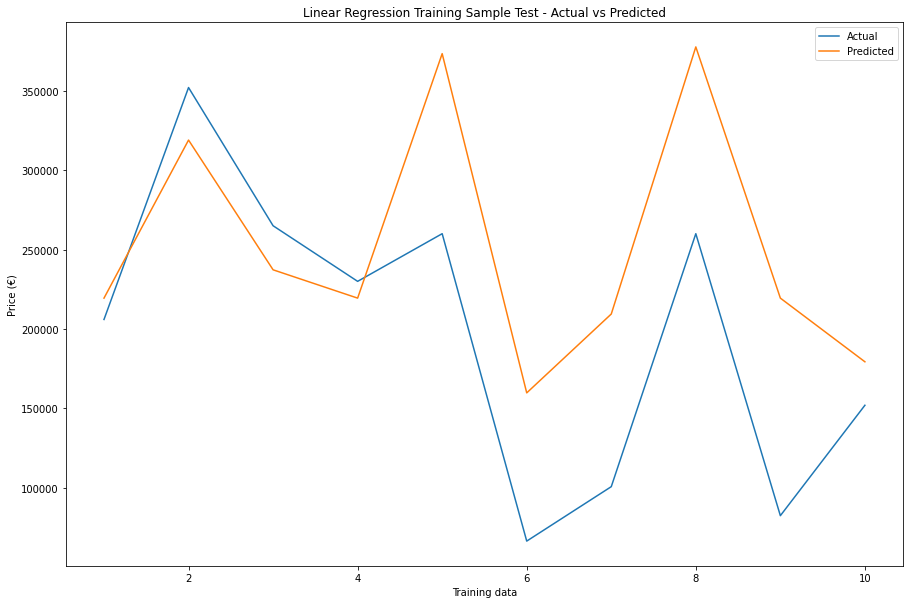

In [24]:
plt.figure(figsize=(15, 10))
plt.plot([x for x in range(1, len(linreg_training_10_predictions) + 1)], training_10_actual, label="Actual")
plt.plot([x for x in range(1, len(linreg_training_10_predictions) + 1)], linreg_training_10_predictions, label="Predicted")
plt.title("Linear Regression Training Sample Test - Actual vs Predicted")
plt.xlabel("Training data")
plt.ylabel("Price (€)")
plt.legend()
plt.show()

Observations: Based on the first 10 rows of training data, our model seems to be able to predict some property prices reasonably accurately (within €10,000/€20,000). However, some predictions are inaccurate (> €100,000), which we deem unacceptable. Our model doesn't appear to be able to handle cases where the house price is very low, and appears to overestimate the house price in most cases.

#### Evaluation measures on full training dataset

In [25]:
linreg_train_predictions = linreg.predict(X_train)
print(f"R2 Score: {r2_score(y_train, linreg_train_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, linreg_train_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, linreg_train_predictions)}")

R2 Score: 0.33094972836263026
Mean Squared Error: 31041333749.69952
Mean Absolute Error: 112648.37210394115


#### Findings so far

The R squared value for our linear model is 0.33, which indicates that our trained linear regression model only explains roughly 33% of the observed price variance. The mean absolute error is €112,648 which implies that our model will generally predict the price of houses very poorly. Ideally, we would prefer predictions to be +/- €10,000 away from the actual value

### Section 2.x: Evaluation of linear regression model

In [26]:
linreg_test_predictions = linreg.predict(X_test)
print(f"R2 Score: {r2_score(y_test, linreg_test_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, linreg_test_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, linreg_test_predictions)}")

R2 Score: 0.3414363946875306
Mean Squared Error: 31817242605.090416
Mean Absolute Error: 115479.51607864258


### Section 2.x: Cross Validation of linear regression model

In [27]:
lin_reg_cv_scores = cross_val_score(LinearRegression(), X_train, y_train, scoring="r2", cv=3)
print("CV scores:", lin_reg_cv_scores)
print("CV mean score:", lin_reg_cv_scores.mean())
print("CV std score:", lin_reg_cv_scores.std())

CV scores: [0.33110748 0.31262002 0.30969972]
CV mean score: 0.3178090730613095
CV std score: 0.009478669013808314


Observations: Cross validation results in a poorer performing model on average, suggesting that our use of hold-out sampling resulted in overfitting to the data.

## Section 3: Decision Trees

### Section 3.x: Train a decision tree

Note that we have set a max depth = 10 during the construction of our decision tree regressor to prevent overfitting to the data

In [62]:
# Instantiate sklearn estimator, fit with training set.
dtr = DecisionTreeRegressor(max_depth=10, random_state=1)
dtr.fit(X_train, y_train)
print(dtr)

DecisionTreeRegressor(max_depth=10, random_state=1)


### Section 3.x: Interpretation of decision tree model

In [63]:
# Compute the importance of each feature based on the trained decision tree classifier
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':dtr.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
26,County_Dublin,0.606908
16,Postal_Code_dublin 6,0.048047
46,County_Wicklow,0.038586
50,Property_Size_Description_unknown,0.034098
14,Postal_Code_dublin 4,0.029928
29,County_Kildare,0.028884
47,Description_of_Property_Second-Hand Dwelling h...,0.027848
49,Property_Size_Description_>= 125,0.022544
24,County_Cork,0.020644
1,Postal_Code_dublin 11,0.018145


In [64]:
# create a Graphviz file which has extension .dot
with open("decision_tree.dot", 'w') as f:
    f = export_graphviz(dtr, out_file=f, feature_names=X_train.columns)

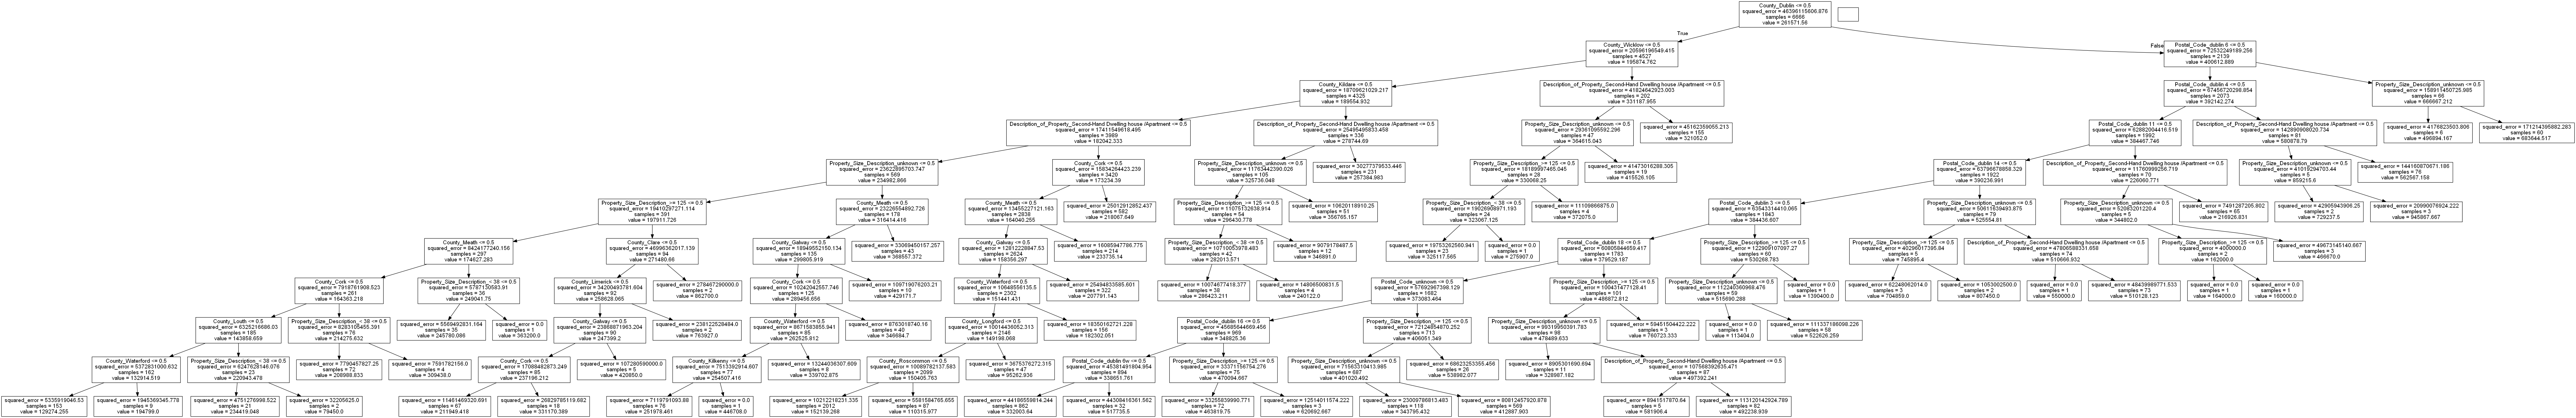

In [65]:
graphs = pydot.graph_from_dot_file('decision_tree.dot')
graph = graphs[0]

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

view_pydot(graph)

#### Observations

Being located in county Dublin appears to be the biggest indicator of property price according to this model by far. Other important characteristics of properties according to this model are the following: being located in Dublin 6, being located in Wicklow, having an unknown property size etc. All other important characteristics can be seen in the graph and feature importance table above

### Section 3.x: Training set predictions

In [66]:
dtr_training_10_predictions = list(dtr.predict(first_10_x))

In [67]:
for i in range(len(dtr_training_10_predictions)):
    print(f"Predicted: {round(dtr_training_10_predictions[i])}, Actual: {training_10_actual[i]}, Difference: {round(dtr_training_10_predictions[i]) - training_10_actual[i]}")

Predicted: 218068, Actual: 206000.0, Difference: 12068.0
Predicted: 321052, Actual: 352000.0, Difference: -30948.0
Predicted: 233735, Actual: 265000.0, Difference: -31265.0
Predicted: 218068, Actual: 230000.0, Difference: -11932.0
Predicted: 332004, Actual: 260000.0, Difference: 72004.0
Predicted: 152139, Actual: 66500.0, Difference: 85639.0
Predicted: 207791, Actual: 100760.0, Difference: 107031.0
Predicted: 343795, Actual: 259999.0, Difference: 83796.0
Predicted: 218068, Actual: 82500.0, Difference: 135568.0
Predicted: 152139, Actual: 152000.0, Difference: 139.0


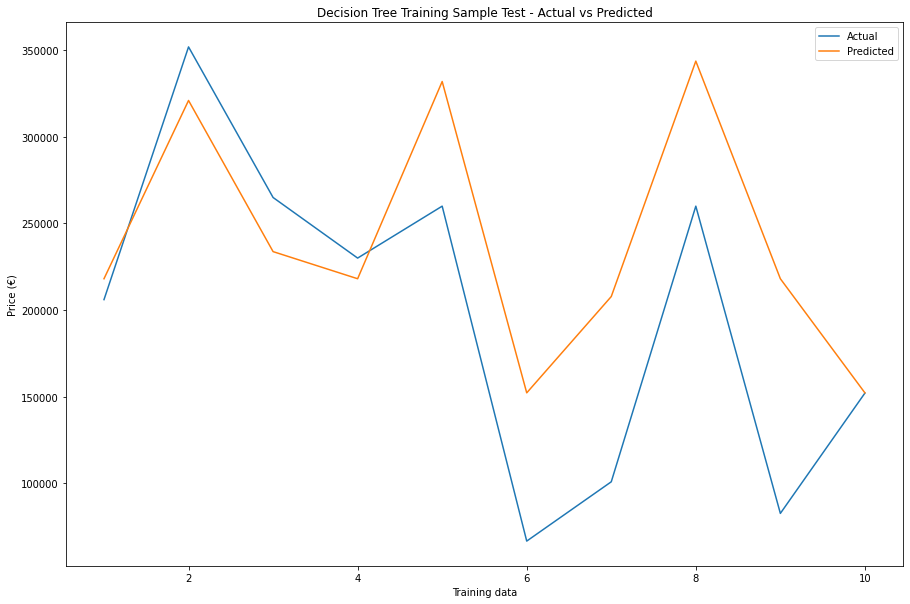

In [68]:
plt.figure(figsize=(15, 10))
plt.plot([x for x in range(1, len(dtr_training_10_predictions) + 1)], training_10_actual, label="Actual")
plt.plot([x for x in range(1, len(dtr_training_10_predictions) + 1)], dtr_training_10_predictions, label="Predicted")
plt.title("Decision Tree Training Sample Test - Actual vs Predicted")
plt.xlabel("Training data")
plt.ylabel("Price (€)")
plt.legend()
plt.show()

In [69]:
dtr_train_predictions = dtr.predict(X_train)
print(f"R2 Score: {r2_score(y_train, dtr_train_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, dtr_train_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, dtr_train_predictions)}")

R2 Score: 0.32440211602818503
Mean Squared Error: 31345117528.517452
Mean Absolute Error: 113668.80761621216


#### Findings so far

The results for the decision tree regressor are very similar to the linear model regressor. Approximately 32% of the price variance is explained by our trained decision tree, and the mean absolute error is again greater than €100,000 (€113,668)

### Section 3.x: Evaluation of Decision Tree

In [70]:
dtr_test_predictions = dtr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, dtr_test_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, dtr_test_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, dtr_test_predictions)}")

R2 Score: 0.31871772376685303
Mean Squared Error: 32914851793.508053
Mean Absolute Error: 117976.2746225338


### Section 3.x: Cross validation of a decision tree

In [71]:
dtr_cv_scores = cross_val_score(DecisionTreeRegressor(max_depth=10, random_state=1), X_train, y_train, scoring="r2", cv=3)
print("\nCV scores:", dtr_cv_scores)
print("\nCV mean score:", dtr_cv_scores.mean())
print("\nCV std score:", dtr_cv_scores.std())


CV scores: [0.28037951 0.29411252 0.27061536]

CV mean score: 0.2817024635259396

CV std score: 0.009638181287310695


## Section 4: Random Forest

### Section 4.x: Train a Random Forest

In [79]:
# Train RF with 100 trees
rfr = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1, max_depth=10)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, oob_score=True, random_state=1)

### Section 4.x: Interpretation of Random Forest

In [80]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance':rfr.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
26,County_Dublin,0.588966
16,Postal_Code_dublin 6,0.046547
47,Description_of_Property_Second-Hand Dwelling h...,0.039223
46,County_Wicklow,0.038796
50,Property_Size_Description_unknown,0.032664
14,Postal_Code_dublin 4,0.030073
29,County_Kildare,0.026564
49,Property_Size_Description_>= 125,0.024884
24,County_Cork,0.019621
37,County_Meath,0.018252


Text(0.5, 0, 'Random Forest Feature Importance')

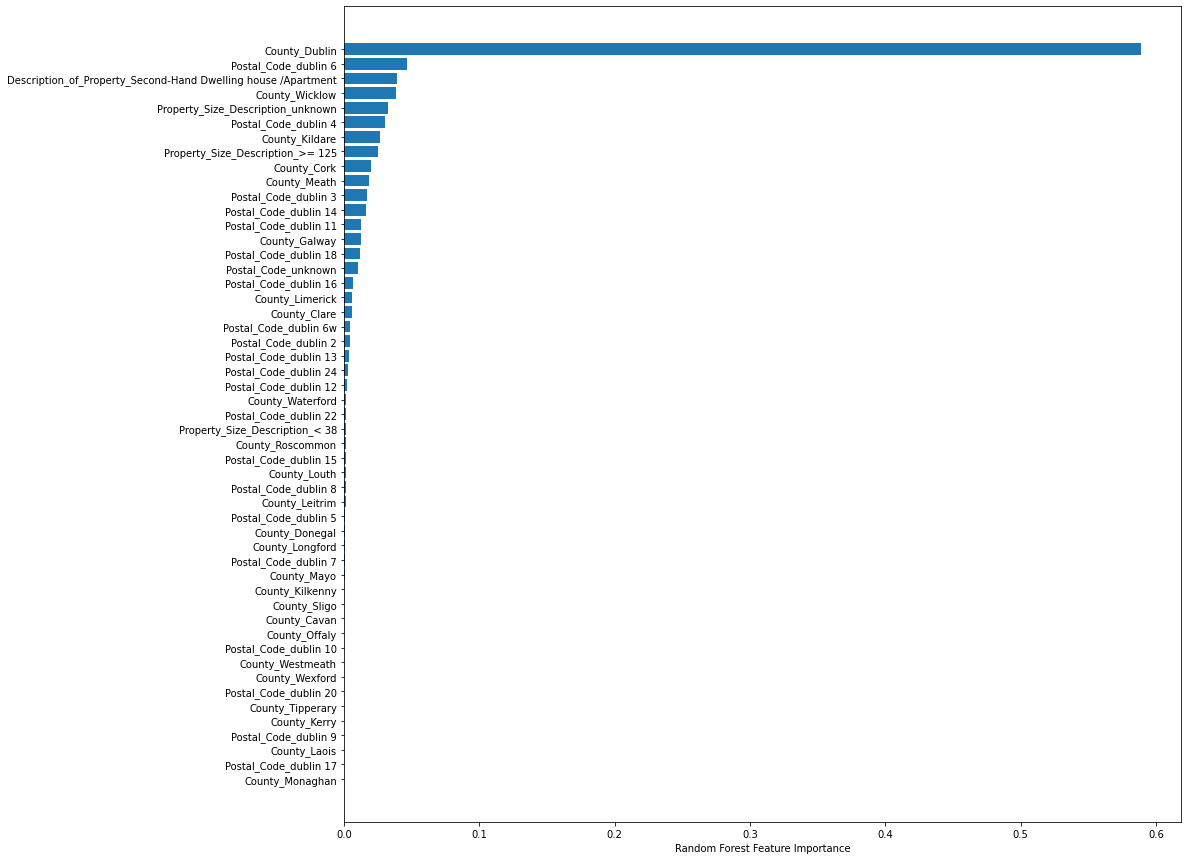

In [81]:
# https://mljar.com/blog/feature-importance-in-random-forest/
sorted_idx = rfr.feature_importances_.argsort()
plt.figure(figsize=(15,15))
plt.barh(X_train.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Observations

The random forest model made very similar decisions to the decision tree model. It put a lot of importance on the property being located in Dublin, and also considered the county's location in Dublin 6 and Wicklow to be important.

### Section 4.x: Training set predictions

In [82]:
rfr_training_10_predictions = list(rfr.predict(first_10_x))

In [83]:
for i in range(len(rfr_training_10_predictions)):
    print(f"Predicted: {round(rfr_training_10_predictions[i])}, Actual: {training_10_actual[i]}, Difference: {round(rfr_training_10_predictions[i]) - training_10_actual[i]}")

Predicted: 217760, Actual: 206000.0, Difference: 11760.0
Predicted: 322329, Actual: 352000.0, Difference: -29671.0
Predicted: 234123, Actual: 265000.0, Difference: -30877.0
Predicted: 217760, Actual: 230000.0, Difference: -12240.0
Predicted: 340687, Actual: 260000.0, Difference: 80687.0
Predicted: 152807, Actual: 66500.0, Difference: 86307.0
Predicted: 207898, Actual: 100760.0, Difference: 107138.0
Predicted: 355320, Actual: 259999.0, Difference: 95321.0
Predicted: 217760, Actual: 82500.0, Difference: 135260.0
Predicted: 158908, Actual: 152000.0, Difference: 6908.0


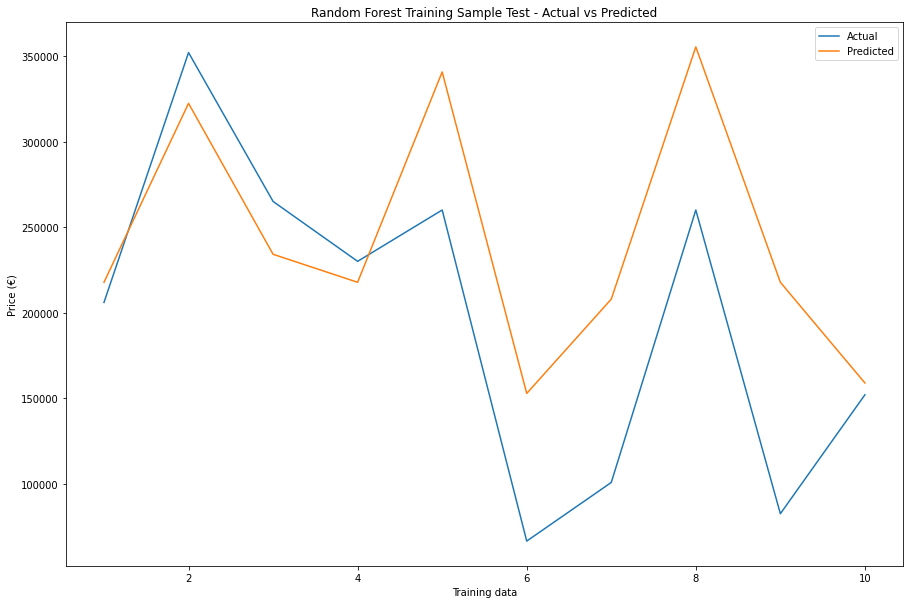

In [84]:
plt.figure(figsize=(15, 10))
plt.plot([x for x in range(1, len(rfr_training_10_predictions) + 1)], training_10_actual, label="Actual")
plt.plot([x for x in range(1, len(rfr_training_10_predictions) + 1)], rfr_training_10_predictions, label="Predicted")
plt.title("Random Forest Training Sample Test - Actual vs Predicted")
plt.xlabel("Training data")
plt.ylabel("Price (€)")
plt.legend()
plt.show()

In [85]:
rfr_train_predictions = rfr.predict(X_train)
print(f"R2 Score: {r2_score(y_train, rfr_train_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_train, rfr_train_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, rfr_train_predictions)}")

R2 Score: 0.33412331934581474
Mean Squared Error: 30894091455.554752
Mean Absolute Error: 112643.80513469492


#### Findings so far

Our random forest model does not appear to perform significantly better or worse than our previous two models. It again explains roughly 33% of the price variance, and has a mean absolute error > €100,000 (€112,643). This tells us that the use of features such as location, size, and description (new/second-hand) do not tell us the whole story about price. We will need to examine the use of other features in the next section of this analysis.

### Section 4.x: Evaluation of Random Forest

In [86]:
rfr_test_predictions = rfr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, rfr_test_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, rfr_test_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rfr_test_predictions)}")

R2 Score: 0.3285163840868852
Mean Squared Error: 32441448237.507698
Mean Absolute Error: 117183.44744500892


### Section 4.x: Cross validation of random forest

In [87]:
dtr_cv_scores = cross_val_score(RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1, max_depth=10), X_train, y_train, scoring="r2", cv=3)
print("\nCV scores:", dtr_cv_scores)
print("\nCV mean score:", dtr_cv_scores.mean())
print("\nCV std score:", dtr_cv_scores.std())


CV scores: [0.30177988 0.30215958 0.29676938]

CV mean score: 0.30023628020721554

CV std score: 0.0024563633858673464


## Section 5: Improving Predictive Models

### Section 5.x: Optimal model vs yearly average

In [45]:
from sklearn.dummy import DummyRegressor

baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train, y_train)

DummyRegressor()

In [46]:
baseline_predictions = baseline_model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, baseline_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, baseline_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, baseline_predictions)}")

R2 Score: -9.300901363995528e-05
Mean Squared Error: 48317583356.802864
Mean Absolute Error: 147827.9174609903


### Section 5.x: Problem understanding/improving optimal model

### Section 5.x: Evaluation of our best model on unseen data

#### Section 5.x.x: Read in the unseen data

In [47]:
unseen_df = pd.read_csv("cleaned_unseen_data.csv")

#### Section 5.x.x: Change the data types

In [48]:
# Change the price variable to a float
unseen_df["Price_€_VAT_incl"] = unseen_df["Price_€_VAT_incl"].astype(float)

In [49]:
# Change the date of sale variable to a datetime variable
unseen_df["Date_of_Sale"] = pd.to_datetime(unseen_df["Date_of_Sale"], format="%Y-%m-%d")

In [50]:
# Change the quarter of sale variable to an object
# This is so that it can be turned into a categorical variable in the next cell
unseen_df["Quarter_of_Sale"] = unseen_df["Quarter_of_Sale"].astype("object")

In [51]:
# Select all columns of type 'object'
object_columns = unseen_df.select_dtypes(['object']).columns

# Convert selected columns to type 'category'
for column in object_columns:
    unseen_df[column] = unseen_df[column].astype('category')
unseen_df.dtypes

Date_of_Sale                 datetime64[ns]
Postal_Code                        category
County                             category
Price_€_VAT_incl                    float64
Description_of_Property            category
Property_Size_Description          category
Month_of_Sale                      category
Quarter_of_Sale                    category
dtype: object

In [52]:
# The input variables will be all columns except for price and date of sale
X_unseen = unseen_df.drop(["Price_€_VAT_incl", "Date_of_Sale"], axis=1)

# The target variable will be property price
y_unseen = unseen_df["Price_€_VAT_incl"]

In [53]:
X_unseen.drop(["Month_of_Sale", "Quarter_of_Sale"], axis=1, inplace=True)

In [54]:
category_columns = X_unseen.select_dtypes(['category']).columns

for each in category_columns:
    dummies = pd.get_dummies(X_unseen[each], prefix=each, drop_first = True)
    X_unseen = pd.concat([X_unseen, dummies], axis=1)
X_unseen = X_unseen.drop(category_columns, axis=1)

In [55]:
X_unseen.columns

Index(['Postal_Code_dublin 10', 'Postal_Code_dublin 11',
       'Postal_Code_dublin 12', 'Postal_Code_dublin 13',
       'Postal_Code_dublin 14', 'Postal_Code_dublin 15',
       'Postal_Code_dublin 16', 'Postal_Code_dublin 17',
       'Postal_Code_dublin 18', 'Postal_Code_dublin 2',
       'Postal_Code_dublin 20', 'Postal_Code_dublin 22',
       'Postal_Code_dublin 24', 'Postal_Code_dublin 3', 'Postal_Code_dublin 4',
       'Postal_Code_dublin 5', 'Postal_Code_dublin 6', 'Postal_Code_dublin 6w',
       'Postal_Code_dublin 7', 'Postal_Code_dublin 8', 'Postal_Code_dublin 9',
       'Postal_Code_unknown', 'County_Cavan', 'County_Clare', 'County_Cork',
       'County_Donegal', 'County_Dublin', 'County_Galway', 'County_Kerry',
       'County_Kildare', 'County_Kilkenny', 'County_Laois', 'County_Leitrim',
       'County_Limerick', 'County_Longford', 'County_Louth', 'County_Mayo',
       'County_Meath', 'County_Monaghan', 'County_Offaly', 'County_Roscommon',
       'County_Sligo', 'County_Tipp

In [56]:
X_unseen.head()

,Postal_Code_dublin 10,Postal_Code_dublin 11,Postal_Code_dublin 12,Postal_Code_dublin 13,Postal_Code_dublin 14,Postal_Code_dublin 15,Postal_Code_dublin 16,Postal_Code_dublin 17,Postal_Code_dublin 18,Postal_Code_dublin 2,...,County_Monaghan,County_Offaly,County_Roscommon,County_Sligo,County_Tipperary,County_Waterford,County_Westmeath,County_Wexford,County_Wicklow,Description_of_Property_Second-Hand Dwelling house /Apartment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X_unseen["Property_Size_Description_< 38"] = 0
X_unseen["Property_Size_Description_>= 125"] = 0
X_unseen["Property_Size_Description_unknown"] = 1

In [58]:
unseen_data_predictions = linreg.predict(X_unseen)
print(f"R2 Score: {r2_score(y_unseen, unseen_data_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_unseen, unseen_data_predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_unseen, unseen_data_predictions)}")

R2 Score: 0.2235442015018163
Mean Squared Error: 40035706030.4159
Mean Absolute Error: 124938.82896726673


Observations: Our model performs slightly worse on unseen data. This may be due to the absense of any data for the property size description feature.